### **Supermarkets have gained immense popularity in recent years due to their unmatched convenience, offering a diverse range of products all under one roof, from groceries to electronics and clothing. Shoppers are drawn to the abundant variety and choices available, enabling them to select from numerous brands and sizes. Furthermore, supermarkets leverage their purchasing power to provide competitive prices and frequent discounts, making them an attractive option for budget-conscious consumers. With extended operating hours, including late evenings and weekends, they cater to busy schedules. Additionally, their commitment to offering fresh produce, seamless technology integration, exceptional customer experiences, and community engagement initiatives have solidified their appeal. Supermarkets continuously innovate to meet evolving consumer preferences, including the demand for organic and eco-friendly products. Their globalization efforts have also made these shopping havens a familiar and trusted presence in international markets.**

#**Package Installation**


In [ ]:
# # Install and load the dplyr package

# install.packages("ggplot2")
# install.packages("tidyverse")
# install.packages("tsibble")
# install.packages("caret")
# install.packages("forecast")
# install.packages("tidymodels")
# install.packages("readr")
# install.packages("dplyr")
# install.packages("lubridate")
# install.packages("xgboost")



# **Library Import**

In [ ]:
library(ggplot2)
library(tidyverse)
library(tsibble)
library(caret)
library(forecast)
library(tidymodels)
library(readr)
library(dplyr)
library(lubridate)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘tsibble’


The following object is masked from ‘package:lubridate’:

    interval


The following objects are masked from ‘package:base’:

    intersect, setdiff, union


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 

# **Load Dataset**

In [ ]:
# Load required packages
# Read CSV file
df <- read.csv("supermarket_sales.csv")

# View the first few rows of the dataset
head(df)


ID          Branch City      Customer.type Gender Product.line          
1 750-67-8428 A      Yangon    Member        Female Health and beauty     
2 226-31-3081 C      Naypyitaw Normal        Female Electronic accessories
3 631-41-3108 A      Yangon    Normal        Male   Home and lifestyle    
4 123-19-1176 A      Yangon    Member        Male   Health and beauty     
5 373-73-7910 A      Yangon    Normal        Male   Sports and travel     
6 699-14-3026 C      Naypyitaw Normal        Male   Electronic accessories
  Unit.price Quantity Tax.5.  Sales    Date      Month Year Time  Payment    
1 74.69      7        26.1415 548.9715 1/5/2019  Jan   2019 13:08 Ewallet    
2 15.28      5         3.8200  80.2200 3/8/2019  Mar   2019 10:29 Cash       
3 46.33      7        16.2155 340.5255 3/3/2019  Mar   2019 13:23 Credit card
4 58.22      8        23.2880 489.0480 1/27/2019 Jan   2019 20:33 Ewallet    
5 86.31      7        30.2085 634.3785 2/8/2019  Feb   2019 10:37 Ewallet    
6 85.39      7        29.8865 627.6165 3/25/2019 Mar   2019 18:30 Ewallet    
  cogs   gross.margin.percentage gross.income Rating
1 522.83 4.761905                26.1415      9.1   
2  76.40 4.761905                 3.8200      9.6   
3 324.31 4.761905                16.2155      7.4   
4 465.76 4.761905                23.2880      8.4   
5 604.17 4.761905                30.2085      5.3   
6 597.73 4.761905                29.8865      4.1

# **Data Pre-Processsing**

In [ ]:
summary(df)

      ID               Branch              City           Customer.type     
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    Gender          Product.line         Unit.price       Quantity    
 Length:1000        Length:1000        Min.   :10.08   Min.   : 1.00  
 Class :character   Class :character   1st Qu.:32.88   1st Qu.: 3.00  
 Mode  :character   Mode  :character   Median :55.23   Median : 5.00  
                                       Mean   :55.67   Mean   : 5.51  
                                       3rd Qu.:77.94   3rd Qu.: 8.00  
                                   

In [ ]:
colSums(is.na(df))

ID                  Branch                    City 
                      0                       0                       0 
          Customer.type                  Gender            Product.line 
                      0                       0                       0 
             Unit.price                Quantity                  Tax.5. 
                      0                       0                       0 
                  Sales                    Date                   Month 
                      0                       0                       0 
                   Year                    Time                 Payment 
                      0                       0                       0 
                   cogs gross.margin.percentage            gross.income 
                      0                       0                       0 
                 Rating 
                      0

In [ ]:
# Check the shape of the dataset
shape <- dim(df)

# Print the shape
cat("Number of rows:", shape[1], "\n")
cat("Number of columns:", shape[2], "\n")


Number of rows: 1000 
Number of columns: 19 


In [ ]:
sum(is.na(df))
str(df)

[1] 0

'data.frame':	1000 obs. of  19 variables:
 $ ID                     : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ City                   : chr  "Yangon" "Naypyitaw" "Yangon" "Yangon" ...
 $ Customer.type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax.5.                 : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Sales                  : num  549 80.2 340.5 489 634.4 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Month                  : chr  "Jan" "Mar" "Mar" "Jan" ...
 $ Year                   : int  2019 2019 2019 2019 2019 2019 2019 2019 2019 20

In [ ]:
df <- df %>% select(-ID,-gross.margin.percentage,-Branch)
head(df)

City      Customer.type Gender Product.line           Unit.price Quantity
1 Yangon    Member        Female Health and beauty      74.69      7       
2 Naypyitaw Normal        Female Electronic accessories 15.28      5       
3 Yangon    Normal        Male   Home and lifestyle     46.33      7       
4 Yangon    Member        Male   Health and beauty      58.22      8       
5 Yangon    Normal        Male   Sports and travel      86.31      7       
6 Naypyitaw Normal        Male   Electronic accessories 85.39      7       
  Tax.5.  Sales    Date      Month Year Time  Payment     cogs   gross.income
1 26.1415 548.9715 1/5/2019  Jan   2019 13:08 Ewallet     522.83 26.1415     
2  3.8200  80.2200 3/8/2019  Mar   2019 10:29 Cash         76.40  3.8200     
3 16.2155 340.5255 3/3/2019  Mar   2019 13:23 Credit card 324.31 16.2155     
4 23.2880 489.0480 1/27/2019 Jan   2019 20:33 Ewallet     465.76 23.2880     
5 30.2085 634.3785 2/8/2019  Feb   2019 10:37 Ewallet     604.17 30.2085     
6 29.8865 627.6165 3/25/2019 Mar   2019 18:30 Ewallet     597.73 29.8865     
  Rating
1 9.1   
2 9.6   
3 7.4   
4 8.4   
5 5.3   
6 4.1

In [ ]:
colnames(df)

[1] "City"          "Customer.type" "Gender"        "Product.line" 
 [5] "Unit.price"    "Quantity"      "Tax.5."        "Sales"        
 [9] "Date"          "Month"         "Year"          "Time"         
[13] "Payment"       "cogs"          "gross.income"  "Rating"

In [ ]:
# Print unique values of each column using cat() function
cat("Unique Product Lines:\n", unique(df$Product.line), "\n\n")
cat("Unique Customer Types:\n", unique(df$Customer.type), "\n\n")
cat("Unique Payment Methods:\n", unique(df$Payment), "\n\n")
cat("Unique Gross Margin Percentages:\n", unique(df$gross.margin.percentage), "\n\n")
cat("Unique Cities:\n", unique(df$City), "\n\n")
cat("Unique Month:\n", unique(df$Month), "\n\n")

Unique Product Lines:
 Health and beauty Electronic accessories Home and lifestyle Sports and travel Food and beverages Fashion accessories 

Unique Customer Types:
 Member Normal 

Unique Payment Methods:
 Ewallet Cash Credit card 

Unique Gross Margin Percentages:
 

Unique Cities:
 Yangon Naypyitaw Mandalay 

Unique Month:
 Jan Mar Feb 



In [ ]:
tail(df)

City      Customer.type Gender Product.line           Unit.price Quantity
995  Naypyitaw Member        Female Electronic accessories 60.95       1      
996  Naypyitaw Normal        Male   Health and beauty      40.35       1      
997  Mandalay  Normal        Female Home and lifestyle     97.38      10      
998  Yangon    Member        Male   Food and beverages     31.84       1      
999  Yangon    Normal        Male   Home and lifestyle     65.82       1      
1000 Yangon    Member        Female Fashion accessories    88.34       7      
     Tax.5.  Sales     Date      Month Year Time  Payment cogs   gross.income
995   3.0475   63.9975 2/18/2019 Feb   2019 11:40 Ewallet  60.95  3.0475     
996   2.0175   42.3675 1/29/2019 Jan   2019 13:46 Ewallet  40.35  2.0175     
997  48.6900 1022.4900 3/2/2019  Mar   2019 17:16 Ewallet 973.80 48.6900     
998   1.5920   33.4320 2/9/2019  Feb   2019 13:22 Cash     31.84  1.5920     
999   3.2910   69.1110 2/22/2019 Feb   2019 15:33 Cash     65.82  3.2910     
1000 30.9190  649.2990 2/18/2019 Feb   2019 13:28 Cash    618.38 30.9190     
     Rating
995  5.9   
996  6.2   
997  4.4   
998  7.7   
999  4.1   
1000 6.6

In [ ]:
# Compute correlation matrix
cor_matrix <- cor(df[, c("Tax.5.","Quantity","Sales","Rating","cogs","Unit.price","gross.income")], use = "complete.obs")
print(cor_matrix)

                 Tax.5.    Quantity      Sales       Rating       cogs
Tax.5.        1.0000000  0.70551019  1.0000000 -0.036441705  1.0000000
Quantity      0.7055102  1.00000000  0.7055102 -0.015814905  0.7055102
Sales         1.0000000  0.70551019  1.0000000 -0.036441705  1.0000000
Rating       -0.0364417 -0.01581490 -0.0364417  1.000000000 -0.0364417
cogs          1.0000000  0.70551019  1.0000000 -0.036441705  1.0000000
Unit.price    0.6339621  0.01077756  0.6339621 -0.008777507  0.6339621
gross.income  1.0000000  0.70551019  1.0000000 -0.036441705  1.0000000
               Unit.price gross.income
Tax.5.        0.633962089    1.0000000
Quantity      0.010777564    0.7055102
Sales         0.633962089    1.0000000
Rating       -0.008777507   -0.0364417
cogs          0.633962089    1.0000000
Unit.price    1.000000000    0.6339621
gross.income  0.633962089    1.0000000


# **Exploratory data analysis (EDA)**

### **Uni-Varient**

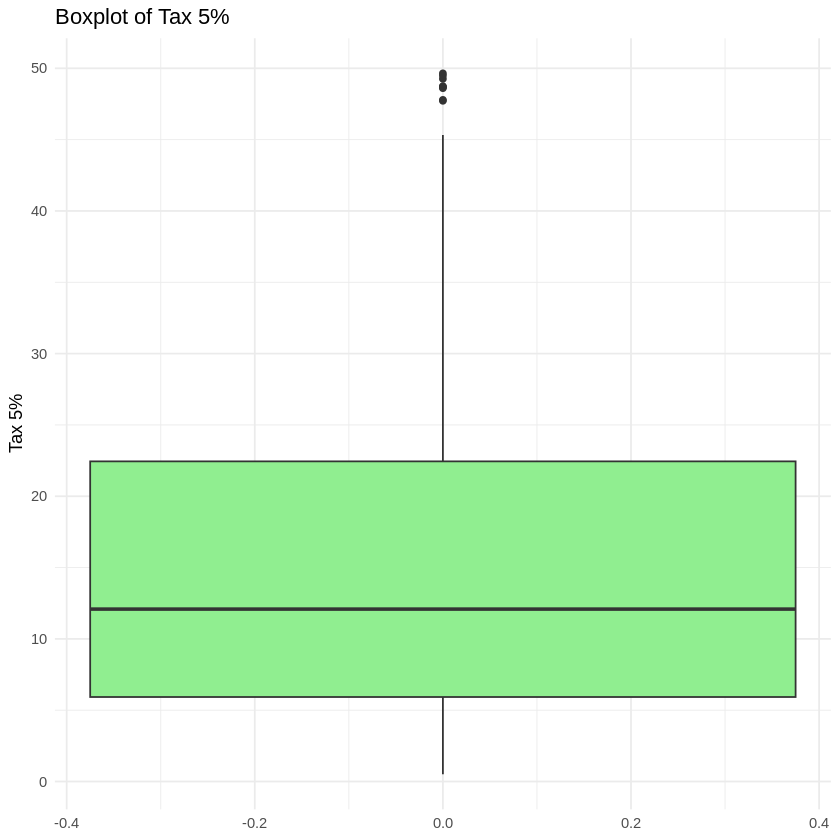

In [ ]:
ggplot(df, aes(y = Tax.5.)) +
  geom_boxplot(fill = "lightgreen") +
  labs(title = "Boxplot of Tax 5%",
       y = "Tax 5%") +
  theme_minimal()

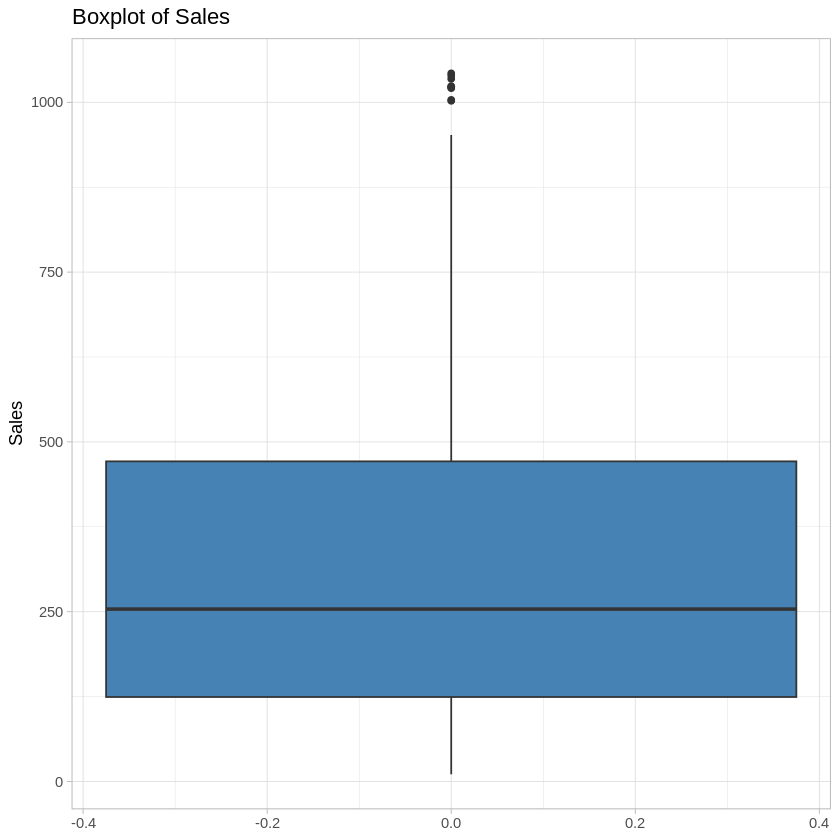

In [ ]:
ggplot(df, aes(y = Sales)) +
  geom_boxplot(fill = "steelblue") +
  labs(title = "Boxplot of Sales",
       y = "Sales") +
  theme_light()

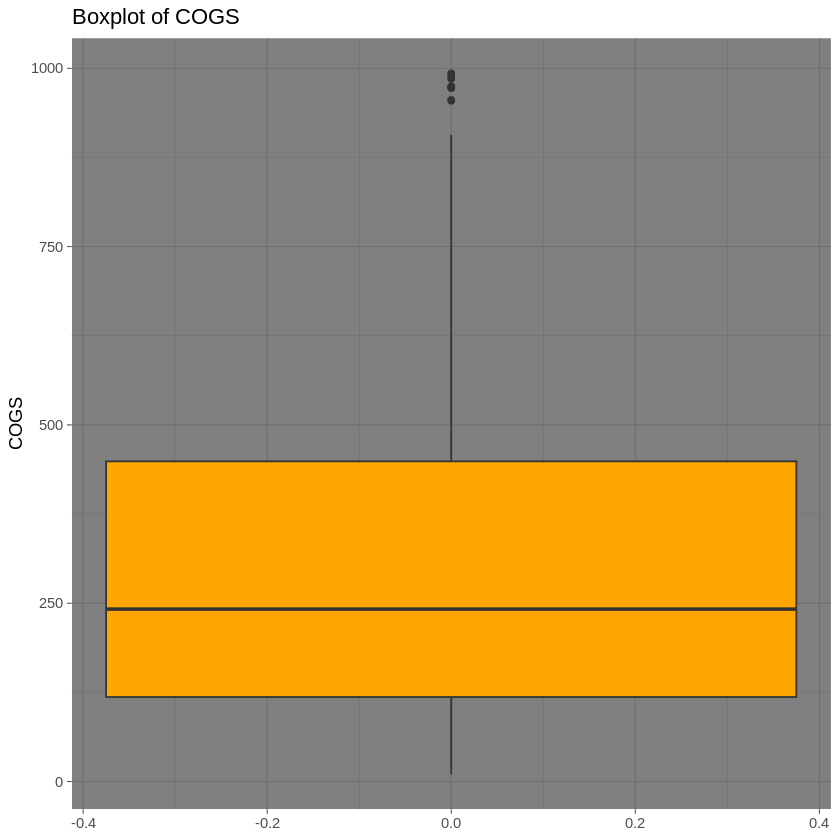

In [ ]:
ggplot(df, aes(y = cogs)) +
  geom_boxplot(fill = "orange") +
  labs(title = "Boxplot of COGS",
       y = "COGS") +
  theme_dark()


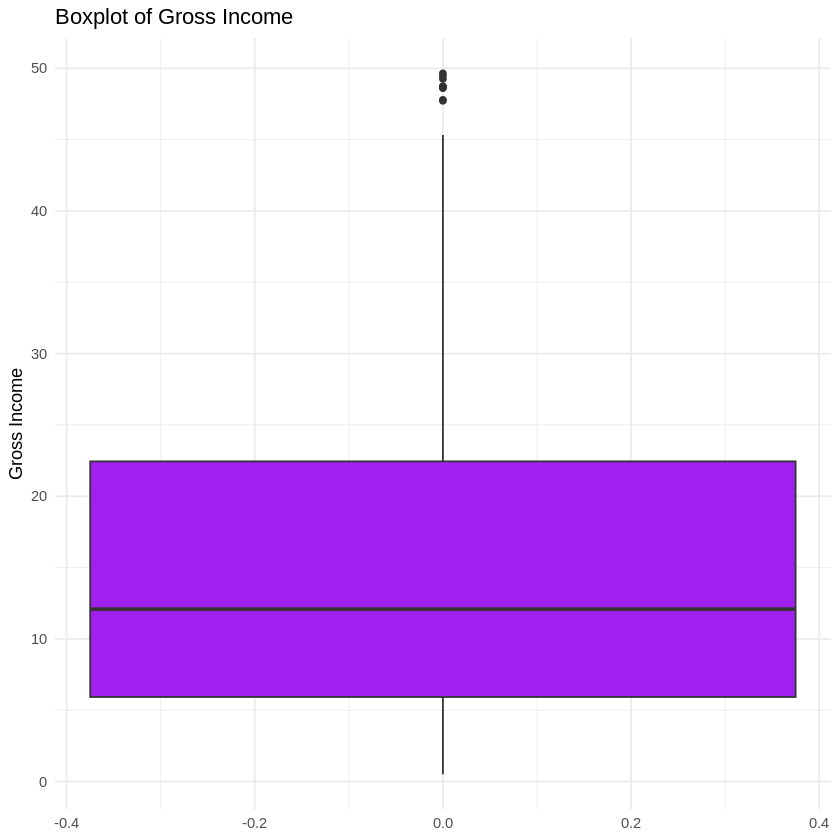

In [ ]:
ggplot(df, aes(y = gross.income)) +
  geom_boxplot(fill = "purple") +
  labs(title = "Boxplot of Gross Income",
       y = "Gross Income") +
  theme_minimal()

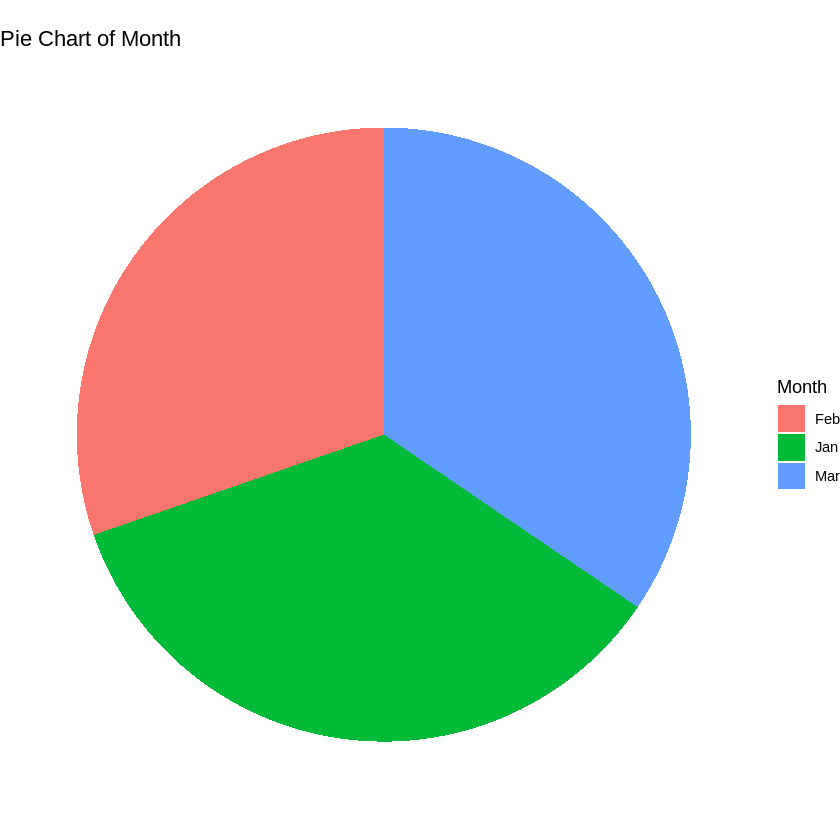

In [ ]:
# Calculate frequencies for each month category
month_freq <- table(df$Month)

# Convert to data frame
month_df <- as.data.frame(month_freq)

# Create pie chart
ggplot(month_df, aes(x = "", y = Freq, fill = Var1)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start=0) +
  labs(title = "Pie Chart of Month",
       fill = "Month",
       y = NULL,
       x = NULL) +
  theme_void()


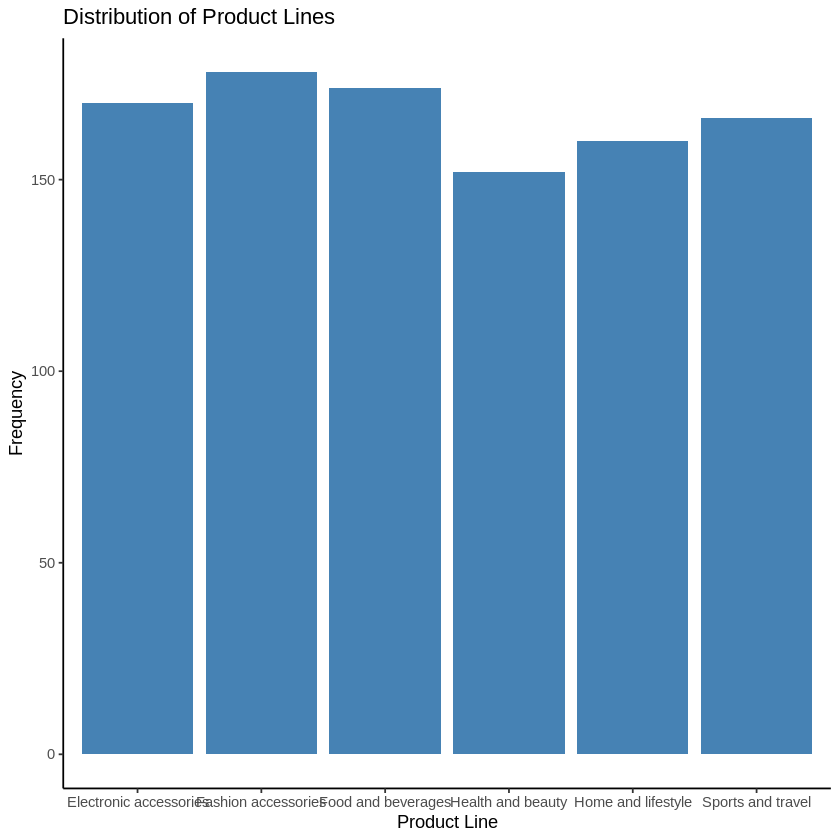

In [ ]:
ggplot(df, aes(x = Product.line)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Distribution of Product Lines",
       x = "Product Line",
       y = "Frequency") +
  theme_classic()


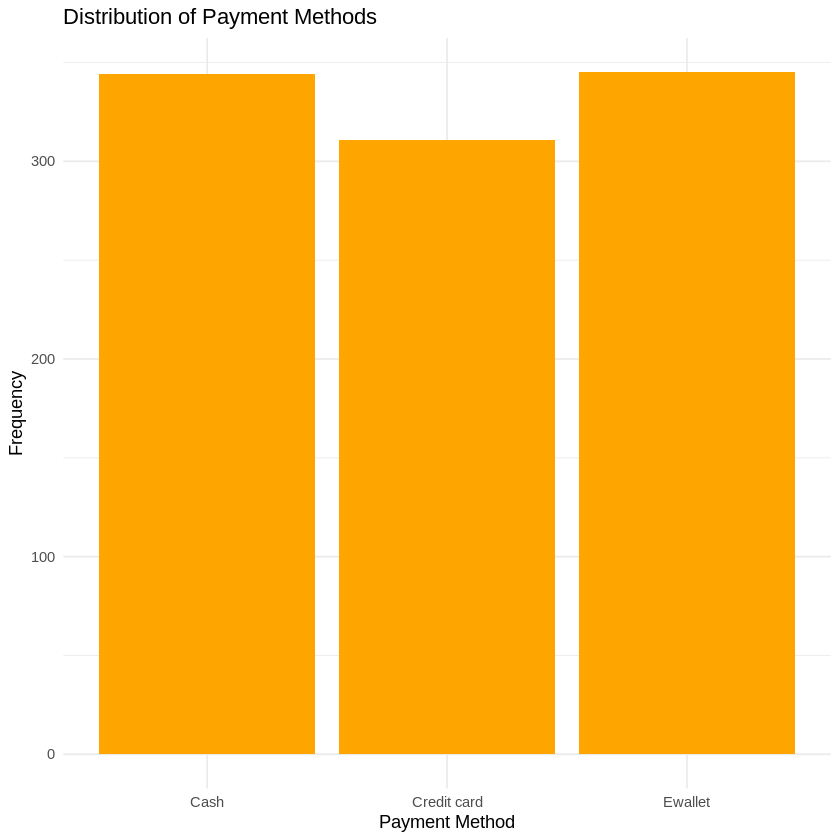

In [ ]:
ggplot(df, aes(x = Payment)) +
  geom_bar(fill = "orange") +
  labs(title = "Distribution of Payment Methods",
       x = "Payment Method",
       y = "Frequency") +
  theme_minimal()


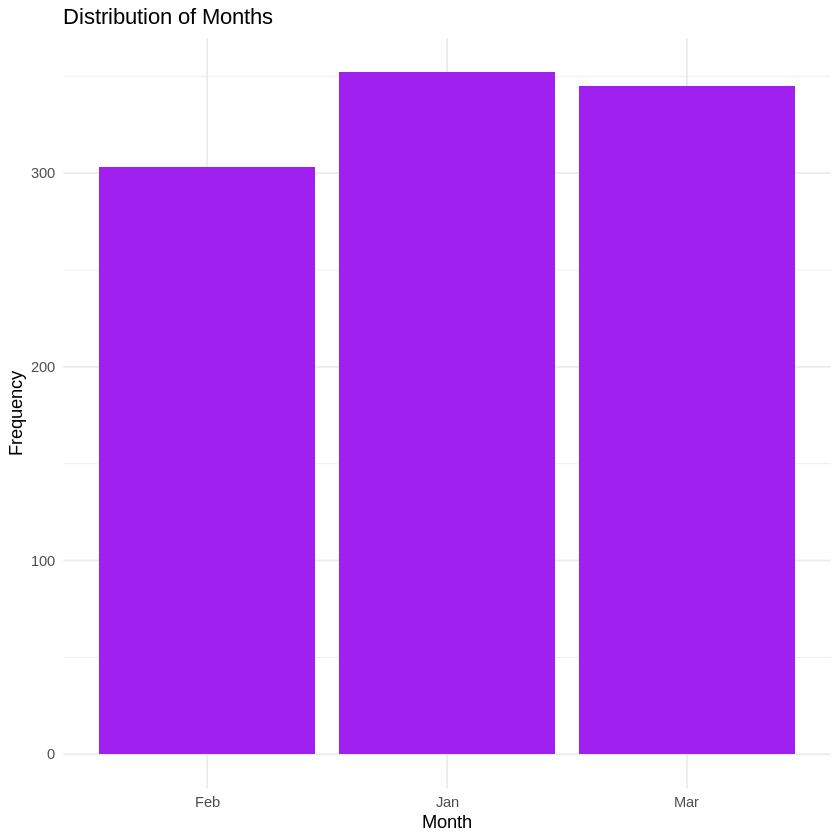

In [ ]:
ggplot(df, aes(x = Month)) +
  geom_bar(fill = "purple") +
  labs(title = "Distribution of Months",
       x = "Month",
       y = "Frequency") +
  theme_minimal()

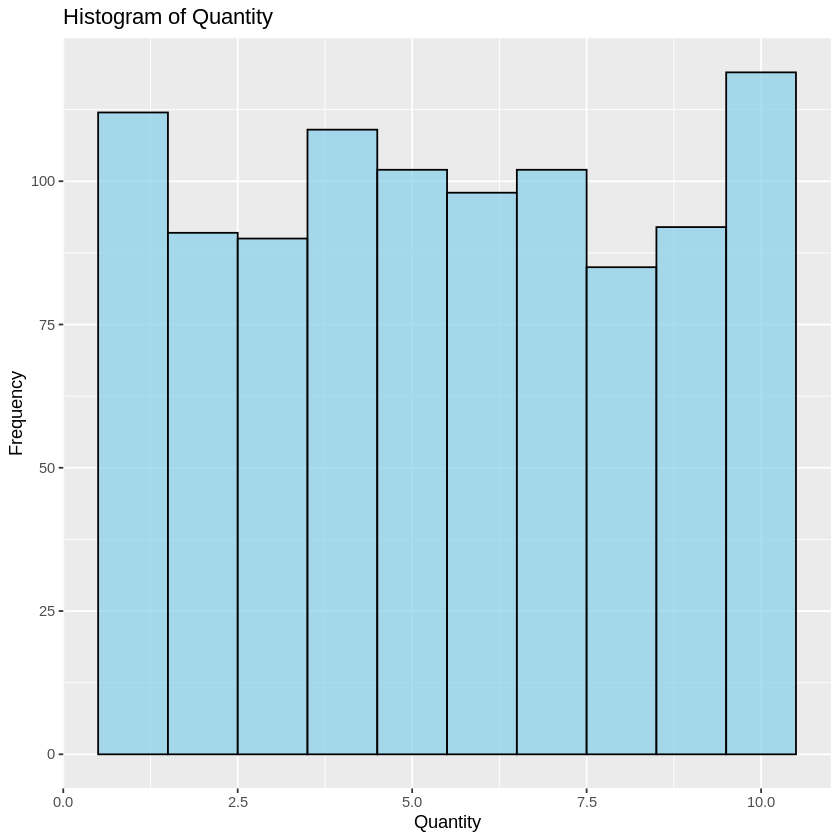

In [ ]:
ggplot(df, aes(x = Quantity)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Quantity",
       x = "Quantity",
       y = "Frequency")


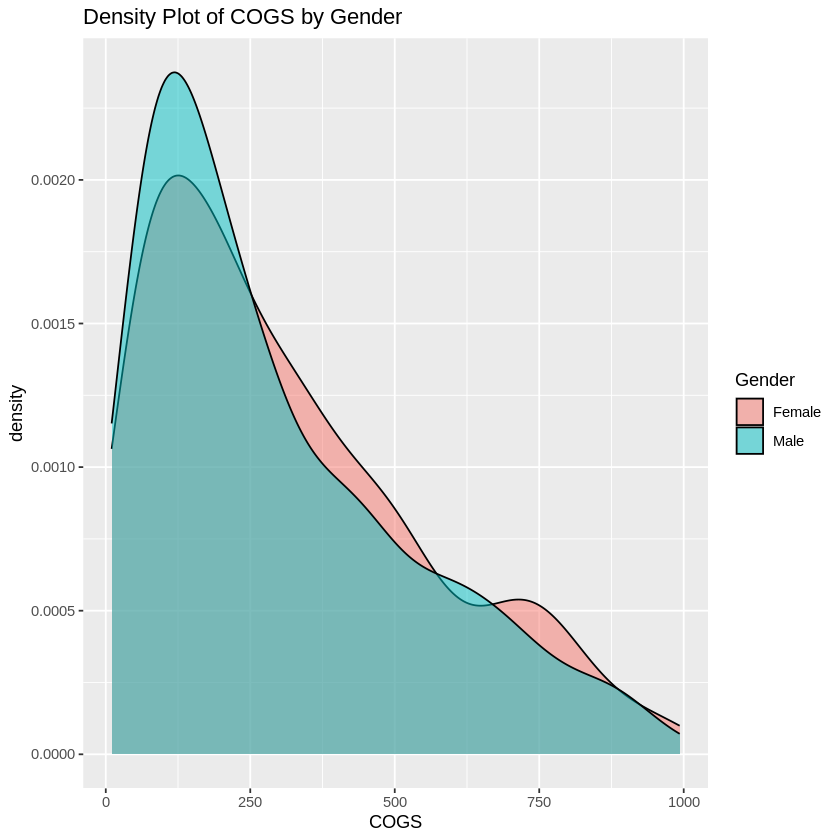

In [ ]:
ggplot(df, aes(x = cogs, fill = Gender)) +
  geom_density(alpha = 0.5) +
  labs(title = "Density Plot of COGS by Gender",
       x = "COGS",
       fill = "Gender")


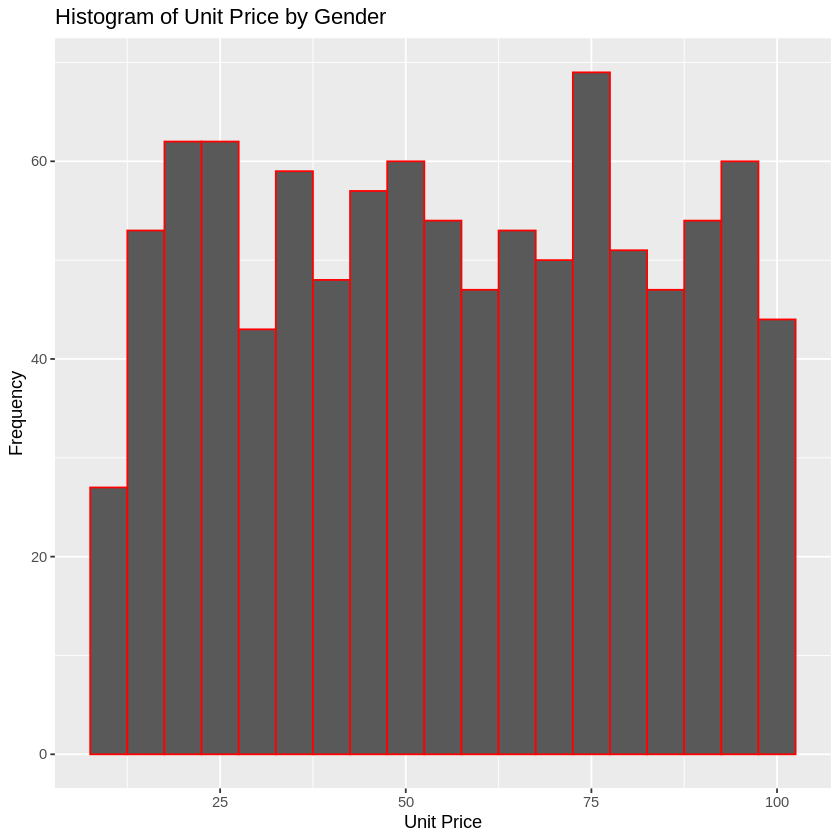

In [ ]:
ggplot(df, aes(x = Unit.price)) +
  geom_histogram(binwidth = 5, position = "dodge",color = "red") +
  labs(title = "Histogram of Unit Price by Gender",
       x = "Unit Price",
       y = "Frequency")


### **BI-Varient**

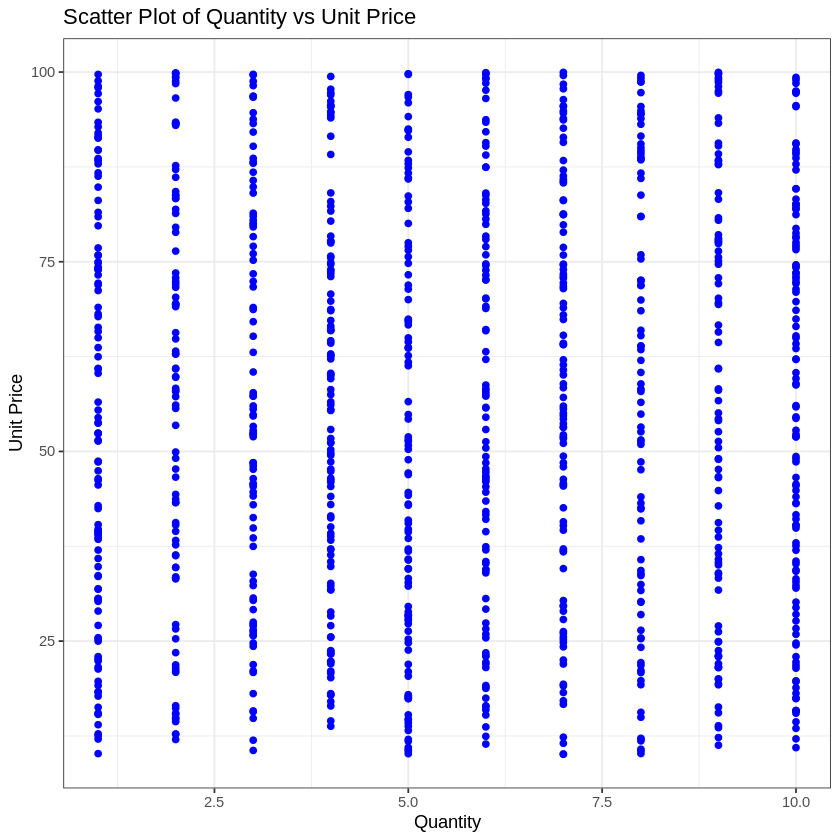

In [ ]:
ggplot(df, aes(x = Quantity, y = Unit.price)) +
  geom_point(color = "blue") +
  labs(title = "Scatter Plot of Quantity vs Unit Price",
       x = "Quantity",
       y = "Unit Price") +
  theme_bw()


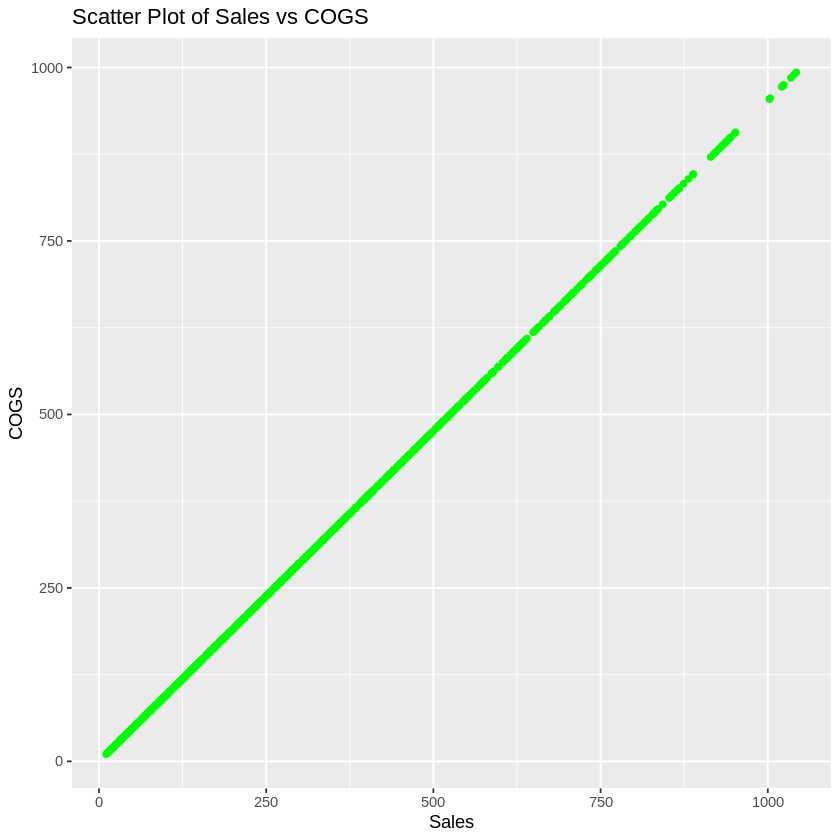

In [ ]:
ggplot(df, aes(x = Sales, y = cogs)) +
  geom_point(color = "green") +
  labs(title = "Scatter Plot of Sales vs COGS",
       x = "Sales",
       y = "COGS")


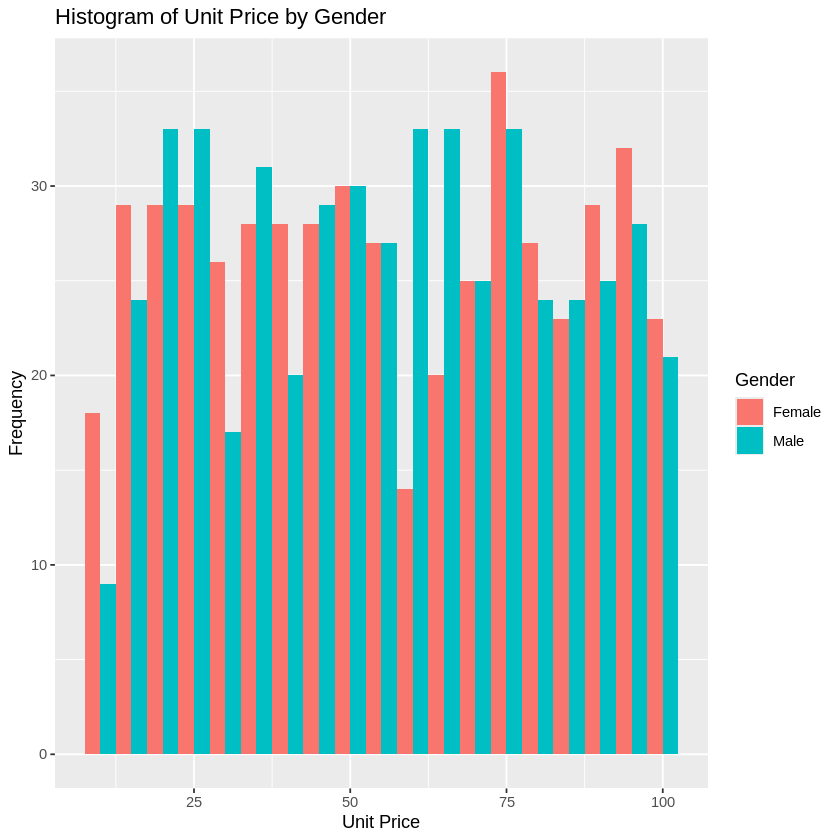

In [ ]:
ggplot(df, aes(x = Unit.price, fill = Gender)) +
  geom_histogram(binwidth = 5, position = "dodge") +
  labs(title = "Histogram of Unit Price by Gender",
       x = "Unit Price",
       y = "Frequency",
       fill = "Gender")


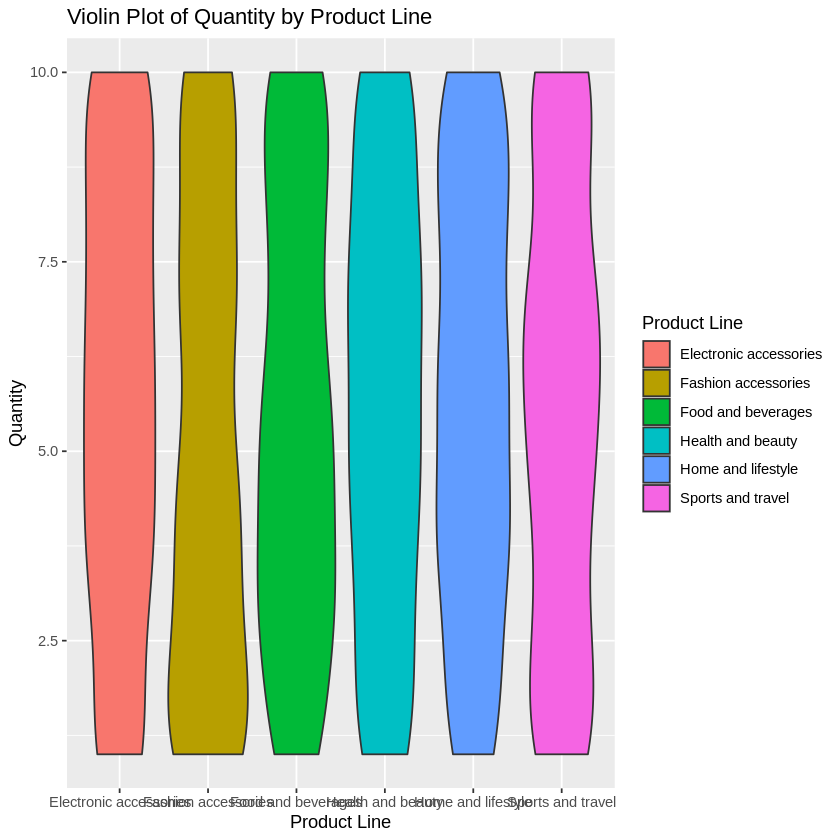

In [ ]:
ggplot(df, aes(x = Product.line, y = Quantity, fill = Product.line)) +
  geom_violin() +
  labs(title = "Violin Plot of Quantity by Product Line",
       x = "Product Line",
       y = "Quantity",
       fill = "Product Line")


### **Multi-Varient**

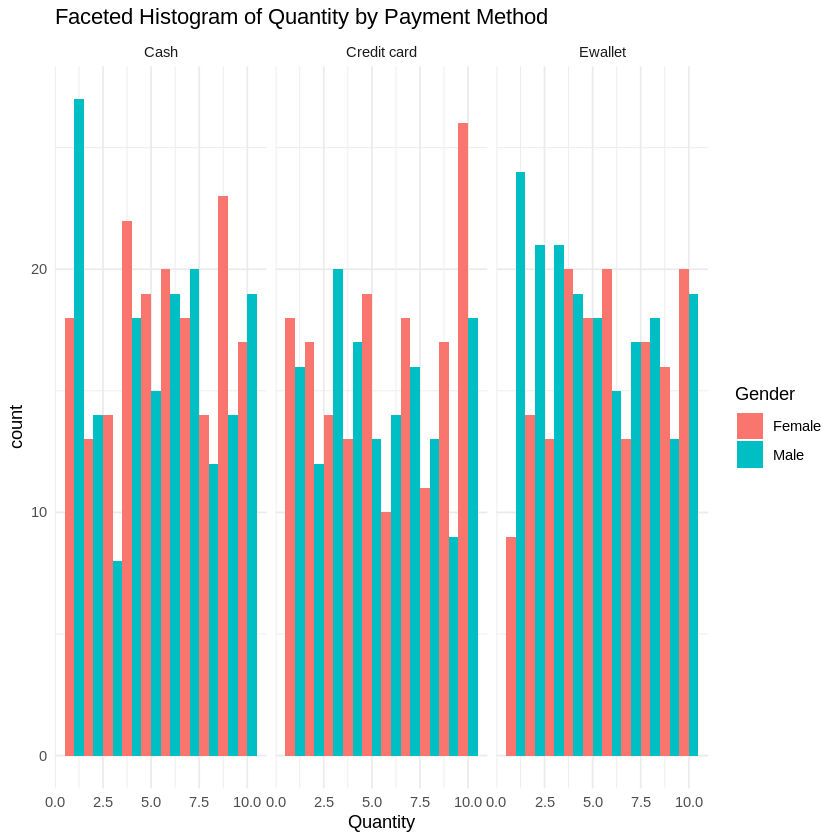

In [ ]:
ggplot(df, aes(x = Quantity, fill = Gender)) +
  geom_histogram(binwidth = 1, position = "dodge") +
  facet_wrap(~Payment) +
  labs(title = "Faceted Histogram of Quantity by Payment Method",
       x = "Quantity",
       fill = "Gender") +
  theme_minimal()


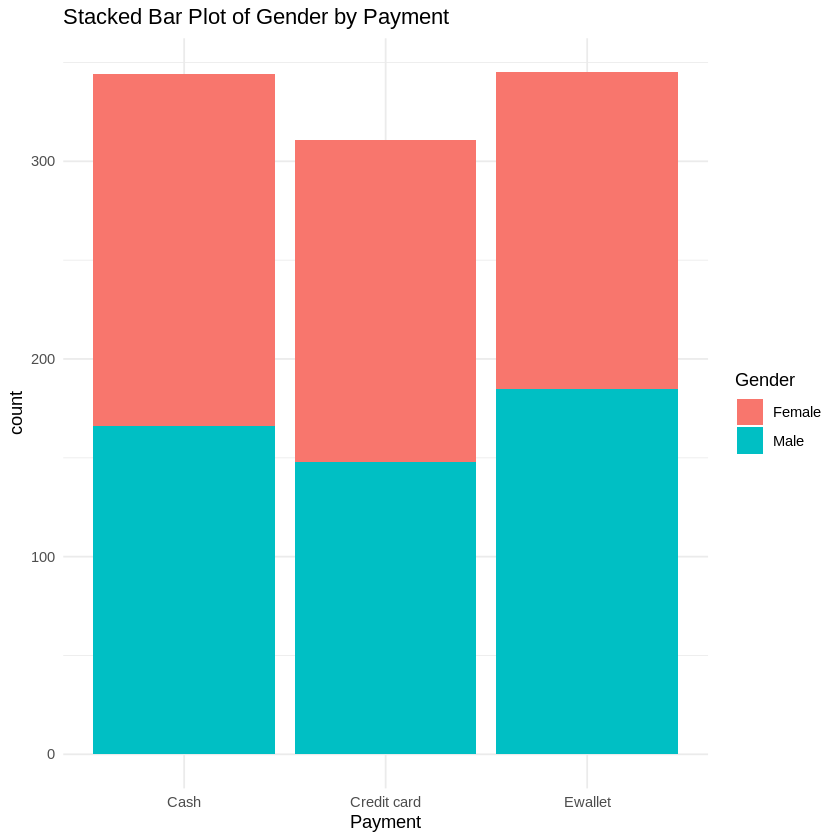

In [ ]:
ggplot(df, aes(x = Payment, fill = Gender)) +
  geom_bar() +
  labs(title = "Stacked Bar Plot of Gender by Payment",
       x = "Payment",
       fill = "Gender") +
  theme_minimal()


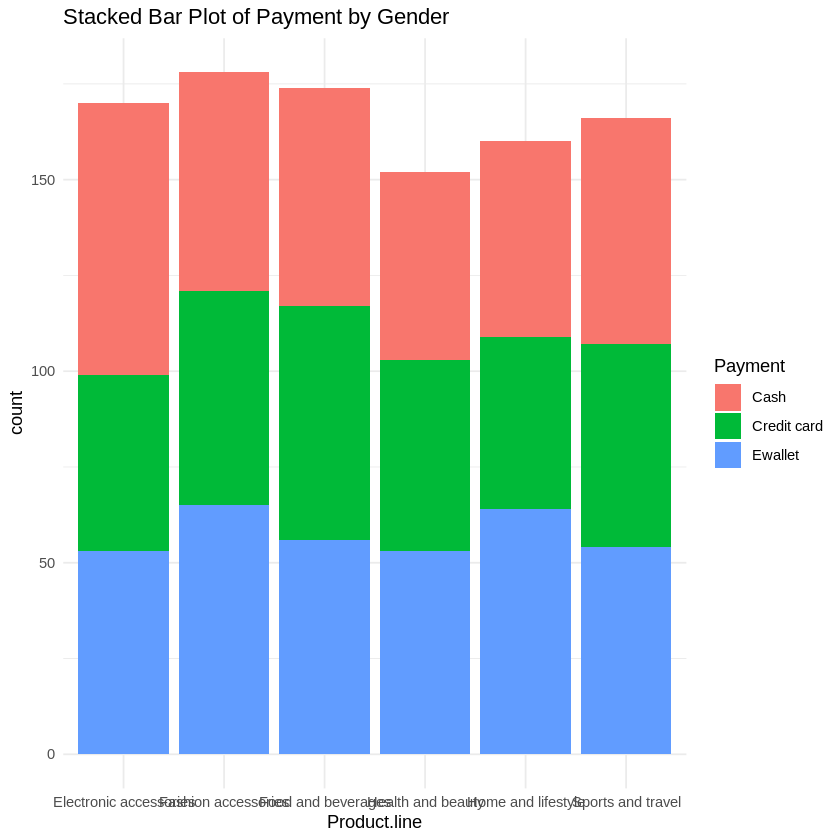

In [ ]:
ggplot(df, aes(x = Product.line, fill = Payment)) +
  geom_bar() +
  labs(title = "Stacked Bar Plot of Payment by Gender",
       x = "Product.line",
       fill = "Payment") +
  theme_minimal()


## **Forecast**






In [ ]:
# Aggregate sales data by month
monthly_sales <- df %>%
  group_by(Month) %>%
  summarise(Total_Sales = sum(Sales, na.rm = TRUE))

In [ ]:
# Find the range of sales values
sales_range <- range(df$Sales, na.rm = TRUE)

# Print the range
cat("Minimum Sales Value:", sales_range[1], "\n")
cat("Maximum Sales Value:", sales_range[2], "\n")


Minimum Sales Value: 10.6785 
Maximum Sales Value: 1042.65 


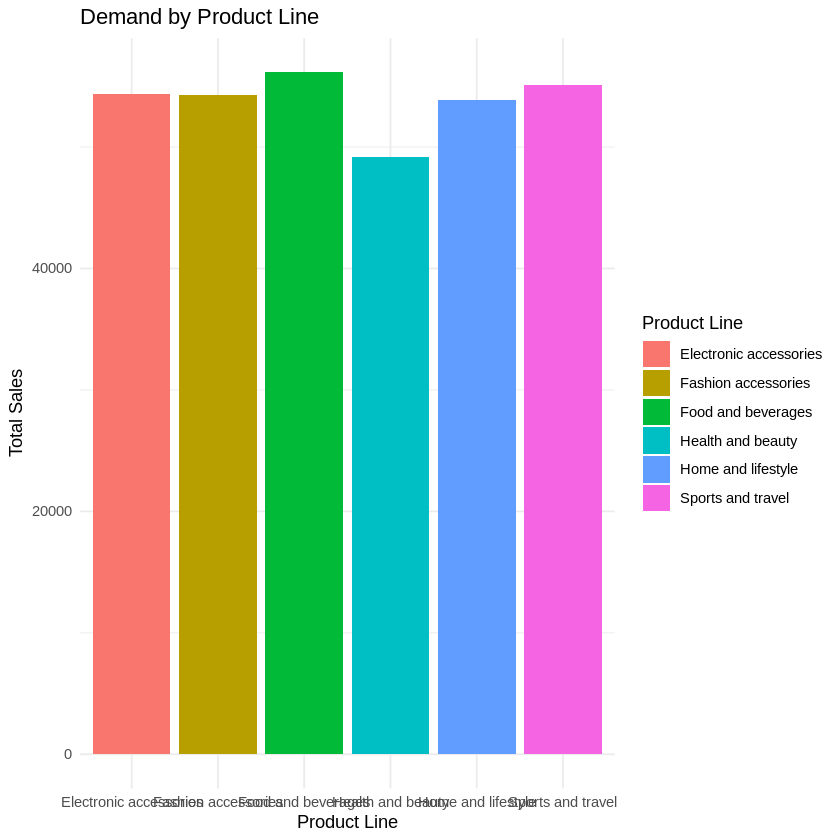

In [ ]:
# Aggregate sales data by product line
product_line_sales <- df %>%
  group_by(Product.line) %>%
  summarise(Total_Sales = sum(Sales, na.rm = TRUE))

# Plotting demand by product line
ggplot(product_line_sales, aes(x = Product.line, y = Total_Sales, fill = Product.line)) +
  geom_bar(stat = "identity") +
  labs(title = "Demand by Product Line",
       x = "Product Line",
       y = "Total Sales",
       fill = "Product Line") +
  theme_minimal()


`summarise()` has grouped output by 'Month'. You can override using the
`.groups` argument.


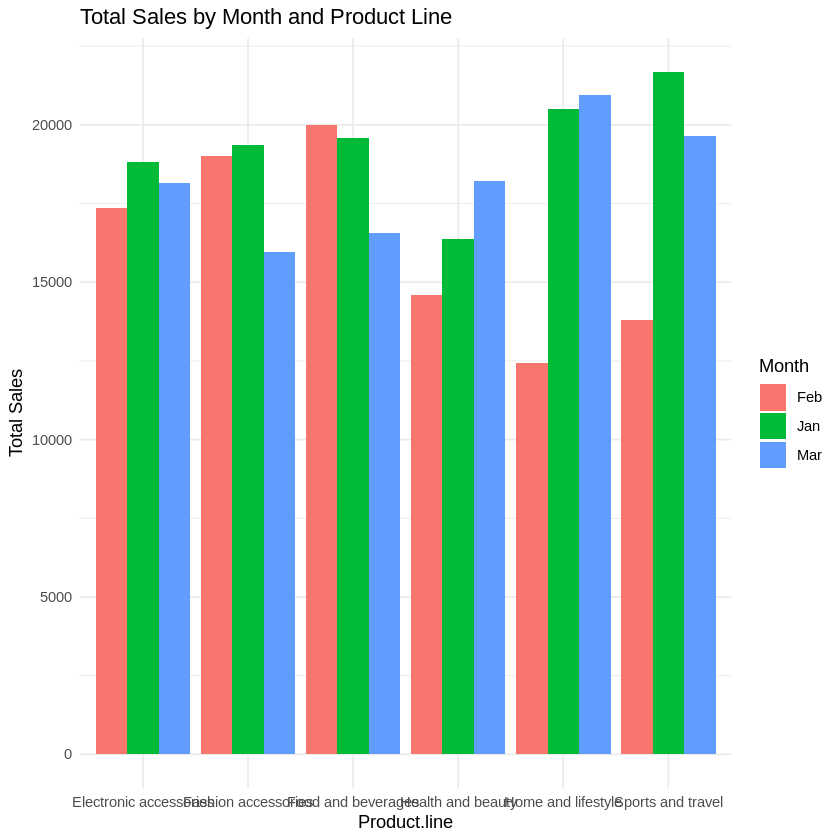

In [ ]:
# Aggregate sales data by month and product line
monthly_sales <- df %>%
  group_by(Month, Product.line) %>%
  summarise(Total_Sales = sum(Sales, na.rm = TRUE))

# Plotting the bar chart
ggplot(monthly_sales, aes(x = Product.line, y = Total_Sales, fill = Month)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Total Sales by Month and Product Line",
       x = "Product.line",
       y = "Total Sales",
       fill = "Month") +
  theme_minimal()


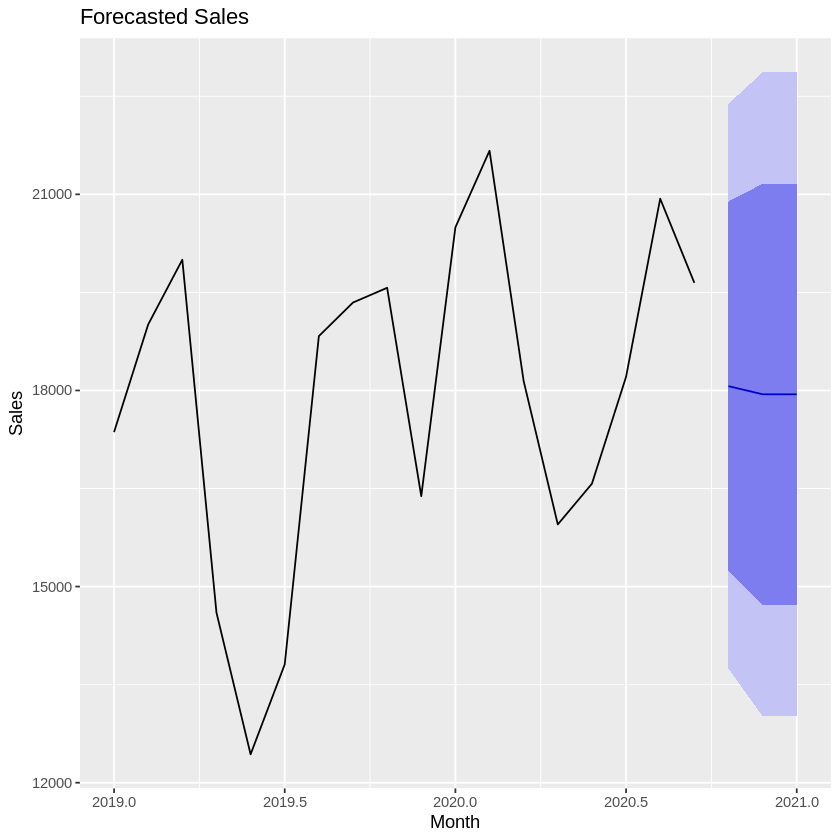

In [ ]:
# Convert data to time series format
sales_ts <- ts(monthly_sales$Total_Sales, start = c(2019, 1), frequency = 10)

# Fit ARIMA model
fit <- auto.arima(sales_ts)

# Forecast future sales
forecast_values <- forecast(fit, h = 3)

# Plotting forecast
autoplot(forecast_values) +
  labs(title = "Forecasted Sales",
       x = "Month",
       y = "Sales")


## **Demand**

In [ ]:
library(dplyr)

# Aggregate sales data by product line
product_line_sales <- df %>%
  group_by(Product.line) %>%
  summarise(Total_Sales = sum(Sales, na.rm = TRUE))

# Print aggregated sales data
print(product_line_sales)


# A tibble: 6 × 2
  Product.line           Total_Sales
  <chr>                        <dbl>
1 Electronic accessories      54338.
2 Fashion accessories         54306.
3 Food and beverages          56145.
4 Health and beauty           49194.
5 Home and lifestyle          53862.
6 Sports and travel           55123.


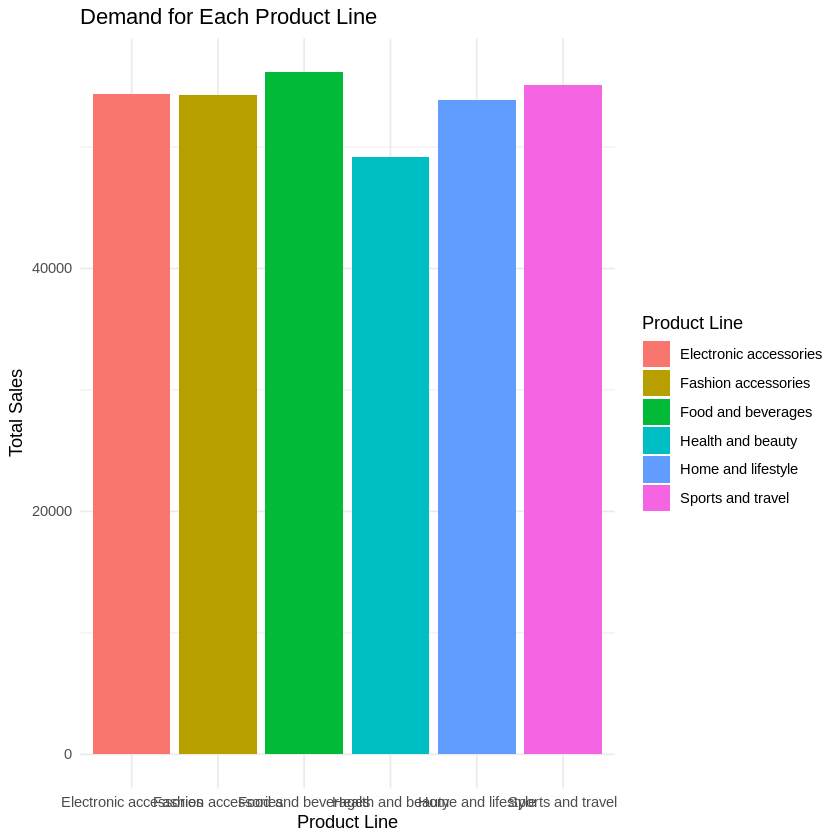

In [ ]:
library(ggplot2)

# Plotting the bar chart
ggplot(product_line_sales, aes(x = Product.line, y = Total_Sales, fill = Product.line)) +
  geom_bar(stat = "identity") +
  labs(title = "Demand for Each Product Line",
       x = "Product Line",
       y = "Total Sales",
       fill = "Product Line") +
  theme_minimal()


## **Supply**

In [ ]:
# Aggregate sales data by Month and Product.line
monthly_sales <- df %>%
  group_by(Month, Product.line) %>%
  summarise(Total_Sales = sum(Sales, na.rm = TRUE))
# Convert data to time series format
sales_ts <- ts(monthly_sales$Total_Sales, start = c(min(df$Year), 1), frequency = 12)

# Fit ARIMA model
fit_sales <- auto.arima(sales_ts)

# Forecast future sales for the next 12 months
forecast_sales <- forecast(fit_sales, h = 12)
# Convert data to time series format
sales_ts <- ts(monthly_sales$Total_Sales, start = c(min(df$Year), 1), frequency = 12)

# Fit ARIMA model
fit_sales <- auto.arima(sales_ts)

# Forecast future sales for the next 12 months
forecast_sales <- forecast(fit_sales, h = 12)
# Prepare data for supply forecasting
supply_data <- df %>%
  select(City, Customer.type, Gender, Product.line, Unit.price, Quantity, Tax.5., Payment, cogs, gross.income, Rating) %>%
  mutate(Supply = cogs + gross.income)

# Split data into training and testing sets
set.seed(123) # Set seed for reproducibility
train_index <- createDataPartition(supply_data$Supply, p = 0.8, list = FALSE)
train_data <- supply_data[train_index, ]
test_data <- supply_data[-train_index, ]

# Fit linear regression model
fit_supply <- lm(Supply ~ ., data = train_data)

# Forecast supply for test data
forecast_supply <- predict(fit_supply, newdata = test_data)



`summarise()` has grouped output by 'Month'. You can override using the
`.groups` argument.


### **Forecast Supply for Demand(Product)**

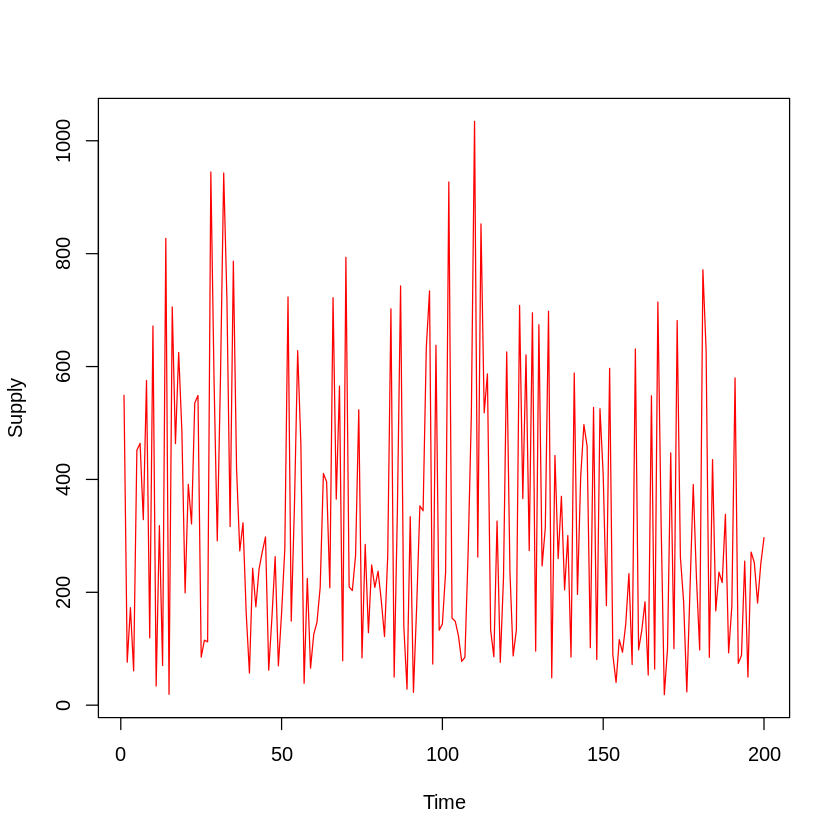

In [ ]:
# Plot forecasted supply using ts plot
plot(forecast_supply, col = "red", type = "l", ylim = c(min(forecast_supply), max(forecast_supply)), xlab = "Time", ylab = "Supply")


# **Model Implementation**

## **ARIMA Model**

In [ ]:
# Aggregate sales data by month
monthly_sales <- df %>%
  group_by(Month) %>%
  summarise(Total_Sales = sum(Sales, na.rm = TRUE))

# Convert data to time series format
sales_ts <- ts(monthly_sales$Total_Sales, start = c(2021, 1), frequency = 3)

# Fit ARIMA model
fit <- auto.arima(sales_ts)

# Forecast future sales
forecast_values_demand <- forecast(fit, h = 3)  # Forecasting for the next 3 months

# Extract forecast values
forecasted_sales <- as.numeric(forecast_values_demand$mean)

# Compute actual values
actual_sales <- monthly_sales$Total_Sales

# Compute MAE
mae <- mean(abs(forecasted_sales - actual_sales))

# Compute RMSE
rmse <- sqrt(mean((forecasted_sales - actual_sales)^2))

# Compute MAPE
mape <- mean(abs((actual_sales - forecasted_sales) / actual_sales)) * 100

# Print accuracy metrics
cat("Mean Absolute Error (MAE):", mae, "\n")
cat("Root Mean Square Error (RMSE):", rmse, "\n")
cat("Mean Absolute Percentage Error (MAPE):", mape, "%\n")


Mean Absolute Error (MAE): 6957.473 
Root Mean Square Error (RMSE): 7889.647 
Mean Absolute Percentage Error (MAPE): 6.601841 %


## **ETS (Error, Trend, Seasonal) Model**

In [ ]:
# Fit ETS model
ets_model <- ets(sales_ts)

# Check model summary
summary(ets_model)


ETS(A,N,N) 

Call:
 ets(y = sales_ts) 

  Smoothing parameters:
    alpha = 0.6416 

  Initial states:
    l = 97219.374 

  sigma:  11011.51
Training set error measures:
                   ME     RMSE      MAE      MPE     MAPE MASE       ACF1
Training set 6357.498 11011.51 6357.498 5.466847 5.466847  NaN -0.6666667

In [ ]:
# Forecast sales for the next 3 months
forecast_values <- forecast(ets_model, h = 3)

# Print forecast values
print(forecast_values)


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2022.000       109455.5 95343.69 123567.3 87873.34 131037.7
2022.333       109455.5 92689.16 126221.9 83813.59 135097.4
2022.667       109455.5 90400.91 128510.1 80314.02 138597.0


In [ ]:
# Extract forecast values
forecasted_sales <- forecast_values$mean

# Extract actual values for the forecast period
actual_sales <- monthly_sales$Total_Sales[(length(monthly_sales$Total_Sales) - length(forecasted_sales) + 1):length(monthly_sales$Total_Sales)]

# Compute accuracy metrics
mae <- mean(abs(forecasted_sales - actual_sales))
rmse <- sqrt(mean((forecasted_sales - actual_sales)^2))
mape <- mean(abs((actual_sales - forecasted_sales) / actual_sales)) * 100

# Print accuracy metrics
cat("Mean Absolute Error (MAE):", mae, "\n")
cat("Root Mean Square Error (RMSE):", rmse, "\n")
cat("Mean Absolute Percentage Error (MAPE):", mape, "%\n")


Mean Absolute Error (MAE): 6357.498 
Root Mean Square Error (RMSE): 8092.358 
Mean Absolute Percentage Error (MAPE): 6.15491 %
